# Articles

## 1. Explainable Artificial Intelligence: Understanding, Visualizing and Interpreting Deep Learning Models.

Wojciech Samek, Thomas Wiegand, Klaus-Robert Muller

 	
https://doi.org/10.48550/arXiv.1708.08296

The aim of this article it to state why we need explainability in machine learning, show how to make and evaluate the quality of explanation . Part  "Why do we need explainable AI?" is easy to understand, because of use examples from real life. Short introduction to one explanation tool, end with link for further information. Advantage - Performing experiment evaluation on 3 different problems: image and text classification and human action recognition form videos. 


## 2. MACE: Model Agnostic Concept Extractor for Explaining Image Classification Networks

Ashish Kumar, Karan Sehgal, Prerna Garg, Vidhya Kamakshi, Narayanan C Krishnan

 	
https://arxiv.org/abs/2011.01472

The aim of this article it to create an explanation method resembling human reasoning by pointing out not the whole object (like classic saliency maps) but the presence (or abscence) of smaller concepts. For some examples icluded in the article the results look really impressive and provide really good explanation of the prediction but for other examples the results are not as clear and the explanations seem a bit far-fetched. Overall, I do not think this method would give good results in our case.


## 3. Explainable text-driven neural network for stock prediction

Linyi Yang, Zheng Zhang, Su Xiong, Linui Wei, James Ng, Lina Xu, Ruihai Dong

https://arxiv.org/pdf/1902.04994

Article has presented useful ideas on text-driven NNs explanations. Authors use articles from Reuters in order to estimate the probability of market losses and gains. Model trained by them uses information about the subjects of different kinds of articles and takes it as the most important one of features, although the score is also dependent on many other factors. All in all, the article provides an interesting insight into this kind of solution to stock price prediction issue.


Abstract
1. Introduction
- motivation & contribution
- related work (mention articles https://proceedings.neurips.cc/paper/2020/hash/3a93a609b97ec0ab0ff5539eb79ef33a-Abstract.html )
2. Dataset and Modeling - show examples of classes, ideas about pattern, used models.
2. Methods - short description of used explanation methods
3. Results
- 9 squares mask;
- method from article https://proceedings.neurips.cc/paper/2020/hash/3a93a609b97ec0ab0ff5539eb79ef33a-Abstract.html 
4. Discussion
- problems we encountered
5. Conclusion

#### **Ground truth**
![alt text](https://images.deepai.org/converted-papers/1906.00657/images/Challenge-2-TRUE.png "Ground truth")

#### **False**
![alt text](https://images.deepai.org/converted-papers/1906.00657/images/Challenge-2-FALSE.png "False")

#### **COUNTERFACTUAL**
![alt text](https://images.deepai.org/converted-papers/1906.00657/images/Challenge-2-COUNTERFACTUAL.png "COUNTERFACTUAL")


Wnioski z podanych przykładów. Nie muszą być prawdziwe dla wszystkich obserwacji ze zbioru.

**Z grupy "Ground truth" mozemy zaóważyć schematy:**
1. Kolory nie powtarzają się w kolumnach;
2. Koła w kolumnach rosną "idąc w doł";
3. Kolejność kolorach w kolumnach: niebieski -> czerwony -> żółty -> niebieski-> ....;

**Grupa "False" nie spełnia żadnego z tych trzech schematów.**

**Grupa "Counterfactual":**
* spełnia schemat 1. oraz 3.;
* nie zawszę spełnia schemat 2.;
* większa różnica między najmniejszym i największym kółkiem;

# Data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
from  torchvision.datasets import ImageFolder 
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
torch.manual_seed(0)

In [ ]:
!git clone https://github.com/human-centered-ai-lab/dat-kandinsky-patterns.git

fatal: destination path 'dat-kandinsky-patterns' already exists and is not an empty directory.


In [ ]:

transform = transforms.Compose([
      transforms.ToTensor(),
      transforms.Resize(160)
])

In [ ]:
data = ImageFolder('/content/dat-kandinsky-patterns/challenge-nr-2/', transform = transform)

In [ ]:
cf = torch.utils.data.Subset(data, list(range(1000)))
false = torch.utils.data.Subset(data, list(range(1000,2000)))
true = torch.utils.data.Subset(data, list(range(2000,3000)))

In [ ]:
train_cf, test_cf = torch.utils.data.random_split(cf, [800, 200])
train_false, test_false = torch.utils.data.random_split(false, [800, 200])
train_true, test_true = torch.utils.data.random_split(true, [800, 200])

In [ ]:
train = torch.utils.data.ConcatDataset([train_cf,train_false,train_true])
test = torch.utils.data.ConcatDataset([test_cf,test_false,test_true])

In [ ]:
classes = ('counterfactual', 'false', 'true')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def imshow(img):
    npimg = img[0].numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(classes[img[1]])

In [ ]:
model = torch.jit.load('/content/drive/MyDrive/Model50_2/resne50_39.pt')

In [ ]:
!pip install shap captum torchinfo

# Lime

In [ ]:
from captum.attr import Lime
explainer = Lime(model)

In [ ]:
from skimage import segmentation

In [ ]:
from captum.attr import visualization

def show_attr(attr_map):
    return visualization.visualize_image_attr(
        attr_map.permute(1, 2, 0).numpy(),
        method='heat_map',
        sign='all',
        show_colorbar=True
    )

def Lime1(x, label):
  print(f"{classes[x[1]]} vs {classes[label]}")
  mask = segmentation.slic(
    x[0].permute(1, 2, 0).mean(axis=2), 
    n_segments=9, 
    compactness=100, 
    start_label=0,
    enforce_connectivity=False,
    # channel_axis=2 # error :(
  )
  attr = explainer.attribute(
      x[0].unsqueeze(0), 
      target=label, 
      n_samples=200, 
      feature_mask=torch.as_tensor(mask),
      show_progress=True
    )
  show_attr(attr[0])

def Lime2(x, label):
  print(f"{classes[x[1]]} vs {classes[label]}")
  mask = segmentation.slic(
    x[0].permute(1, 2, 0).mean(axis=2), 
    n_segments=11, 
    compactness=0.005, 
    start_label=0,
    enforce_connectivity=False,
    # channel_axis=2 # error :(
  )
  attr = explainer.attribute(
      x[0].unsqueeze(0), 
      target=label, 
      n_samples=200, 
      feature_mask=torch.as_tensor(mask),
      show_progress=True
    )
  show_attr(attr[0])

# Lime2 - maska wyłapująca kółka

## Counterfactual

### Lime2 - Counterfactual

counterfactual vs counterfactual


Lime attribution: 100%|██████████| 200/200 [00:25<00:00,  7.70it/s]


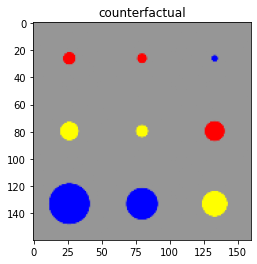

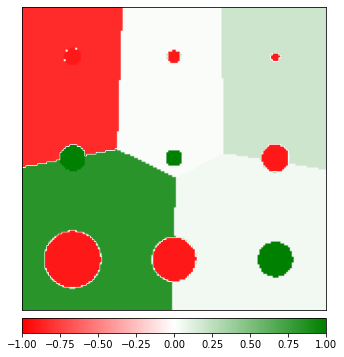

counterfactual vs counterfactual


Lime attribution: 100%|██████████| 200/200 [00:26<00:00,  7.66it/s]


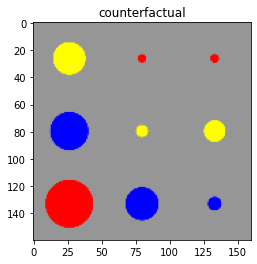

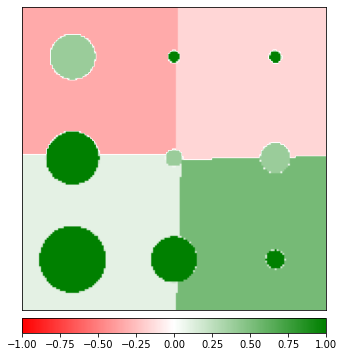

counterfactual vs counterfactual


Lime attribution: 100%|██████████| 200/200 [00:25<00:00,  7.77it/s]


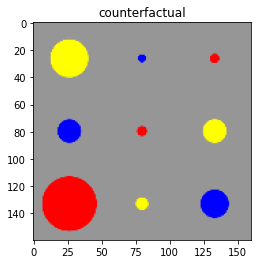

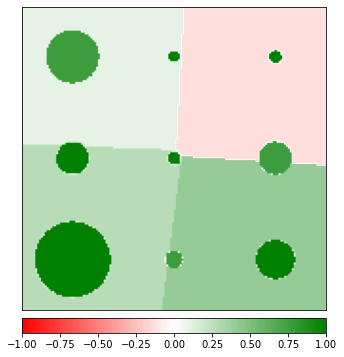

counterfactual vs counterfactual


Lime attribution: 100%|██████████| 200/200 [00:25<00:00,  7.74it/s]


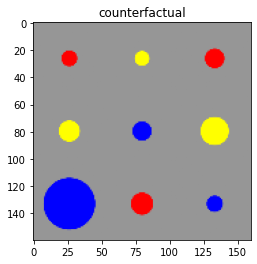

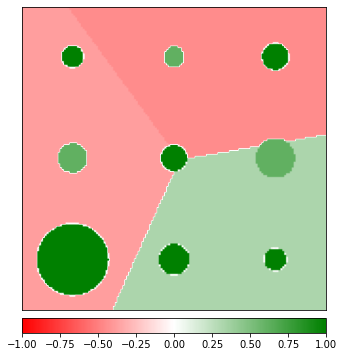

counterfactual vs counterfactual


Lime attribution: 100%|██████████| 200/200 [00:26<00:00,  7.66it/s]


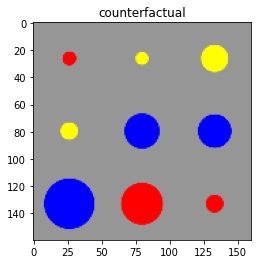

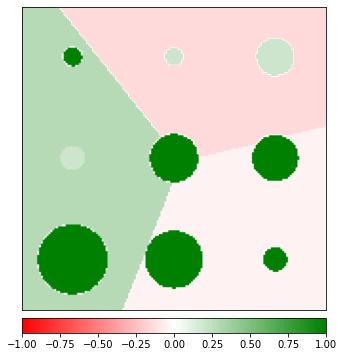

counterfactual vs counterfactual


Lime attribution: 100%|██████████| 200/200 [00:26<00:00,  7.69it/s]


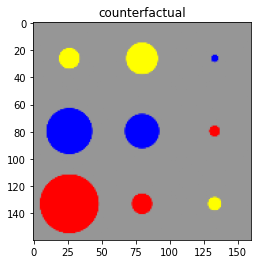

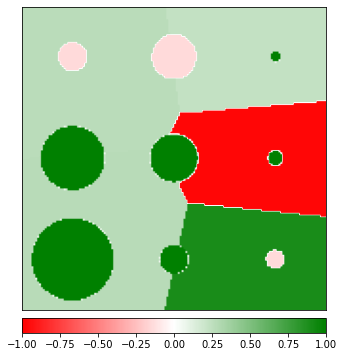

counterfactual vs counterfactual


Lime attribution: 100%|██████████| 200/200 [00:26<00:00,  7.69it/s]


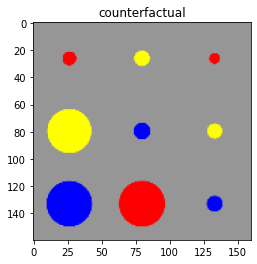

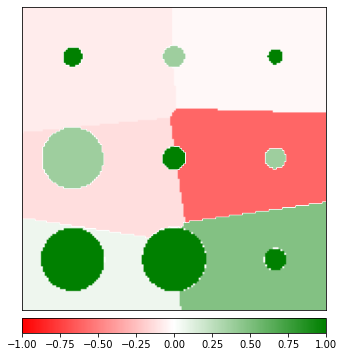

counterfactual vs counterfactual


Lime attribution: 100%|██████████| 200/200 [00:25<00:00,  7.72it/s]


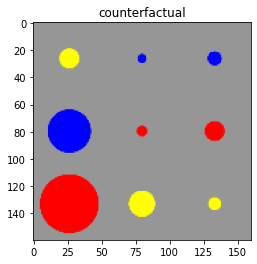

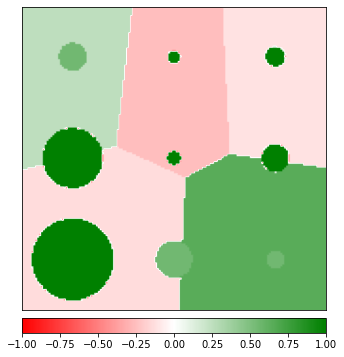

counterfactual vs counterfactual


Lime attribution: 100%|██████████| 200/200 [00:25<00:00,  7.74it/s]


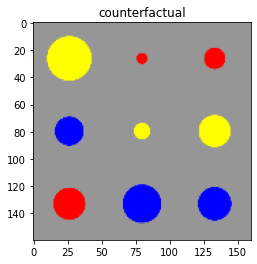

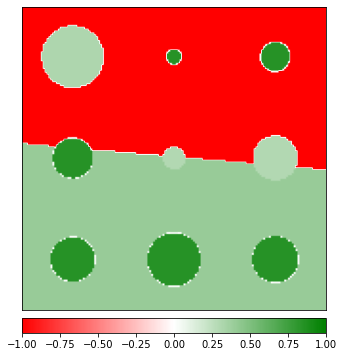

counterfactual vs counterfactual


Lime attribution: 100%|██████████| 200/200 [00:25<00:00,  7.70it/s]


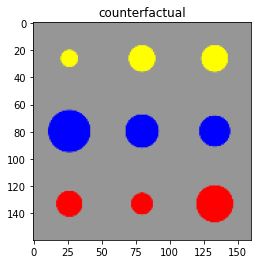

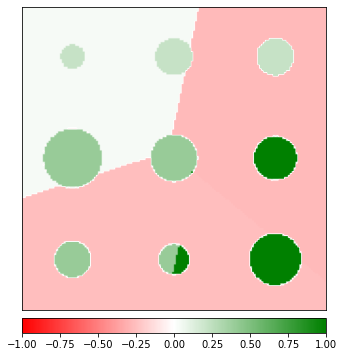

In [ ]:
for i in range(10):
    imshow(data[11*i])
    Lime2(data[11*i], data[11*i][1])

### Lime2- False

false vs false


Lime attribution: 100%|██████████| 200/200 [00:21<00:00,  9.10it/s]


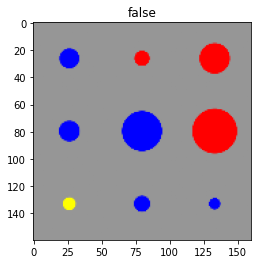

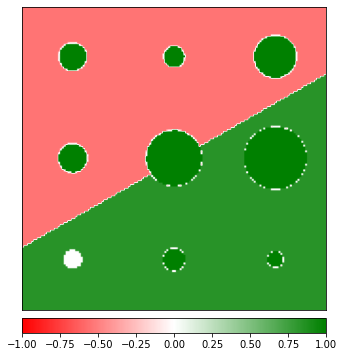

false vs false


Lime attribution: 100%|██████████| 200/200 [00:21<00:00,  9.11it/s]


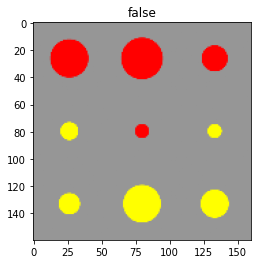

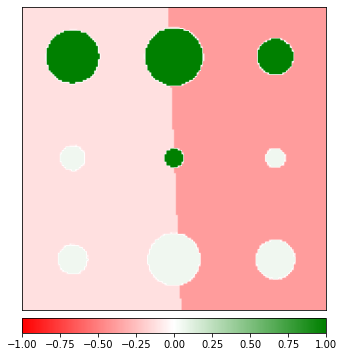

false vs false


Lime attribution: 100%|██████████| 200/200 [00:21<00:00,  9.13it/s]


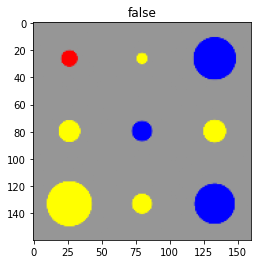

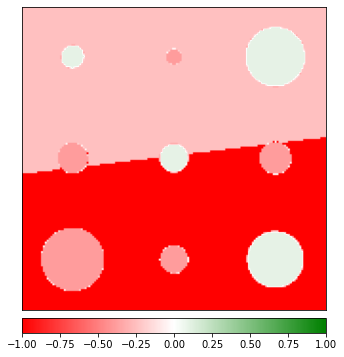

false vs false


Lime attribution: 100%|██████████| 200/200 [00:22<00:00,  9.08it/s]


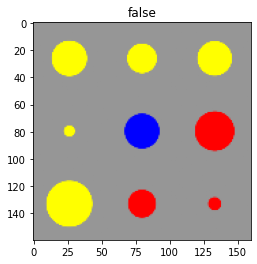

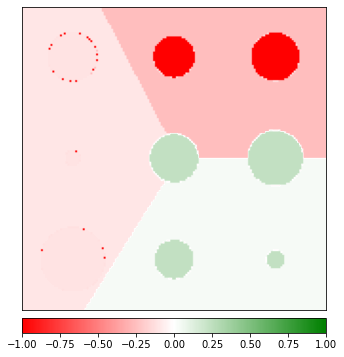

false vs false


Lime attribution: 100%|██████████| 200/200 [00:22<00:00,  9.07it/s]


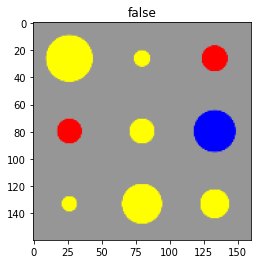

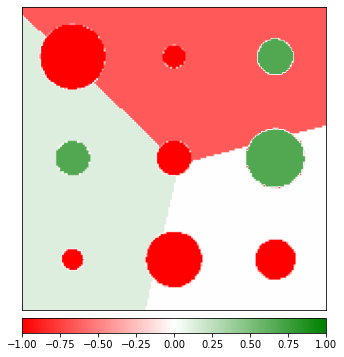

false vs false


Lime attribution: 100%|██████████| 200/200 [00:22<00:00,  9.02it/s]


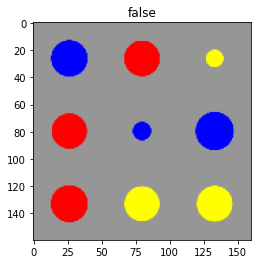

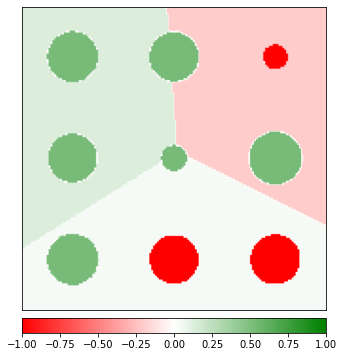

false vs false


Lime attribution: 100%|██████████| 200/200 [00:22<00:00,  8.86it/s]


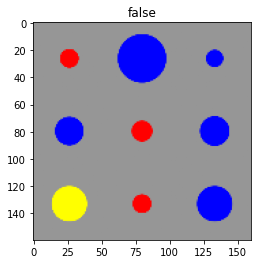

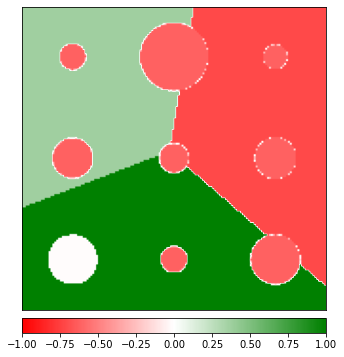

false vs false


Lime attribution: 100%|██████████| 200/200 [00:23<00:00,  8.41it/s]


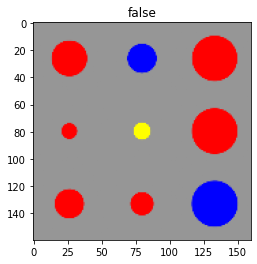

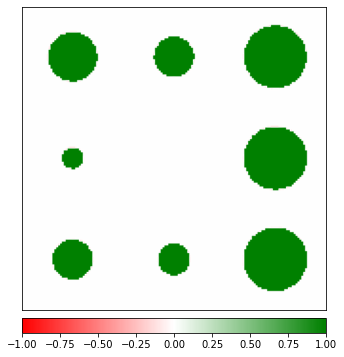

false vs false


Lime attribution: 100%|██████████| 200/200 [00:21<00:00,  9.24it/s]


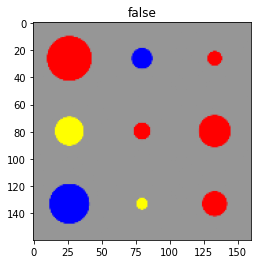

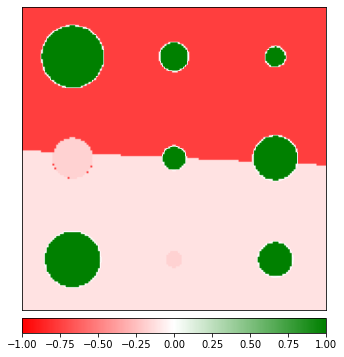

false vs false


Lime attribution: 100%|██████████| 200/200 [00:22<00:00,  8.80it/s]


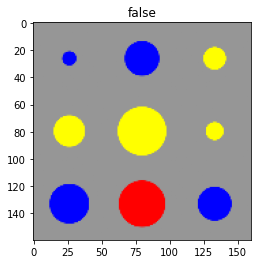

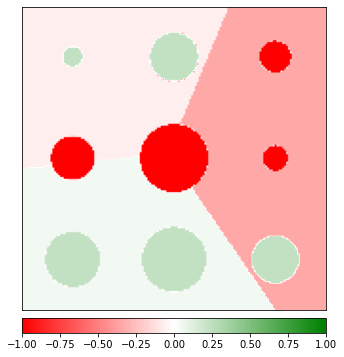

In [ ]:
for i in range(10):
    imshow(data[11*i+1000])
    Lime2(data[11*i+1000], data[11*i+1000][1])

### Lime2- True

true vs true


Lime attribution: 100%|██████████| 200/200 [00:26<00:00,  7.66it/s]


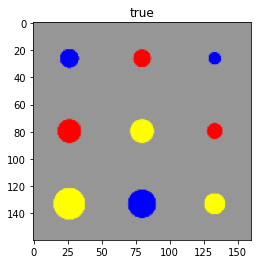

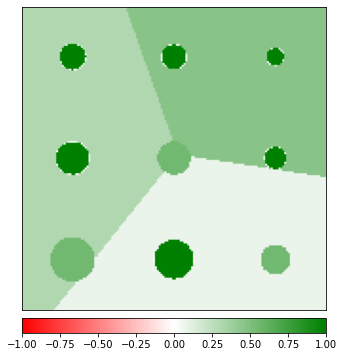

/usr/local/lib/python3.7/dist-packages/captum/attr/_core/lime.py:665: UserWarning: Minimum element in feature mask is not 0, shifting indices to start at 0.
  "Minimum element in feature mask is not 0, shifting indices to"


true vs true


Lime attribution: 100%|██████████| 200/200 [00:25<00:00,  7.70it/s]


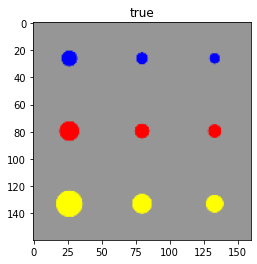

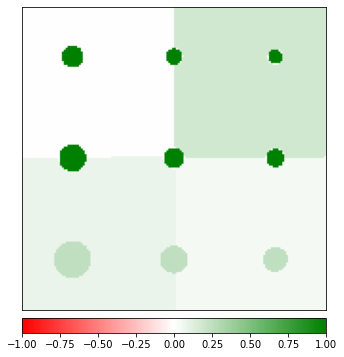

true vs true


Lime attribution: 100%|██████████| 200/200 [00:25<00:00,  7.74it/s]


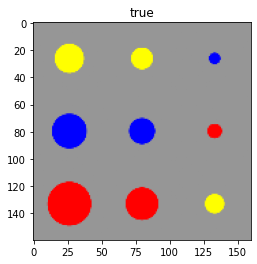

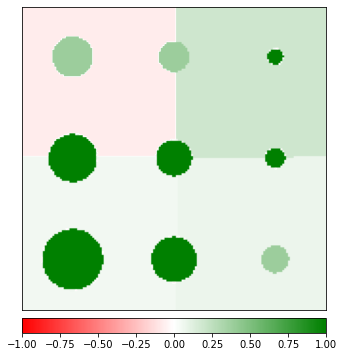

true vs true


Lime attribution: 100%|██████████| 200/200 [00:25<00:00,  7.76it/s]


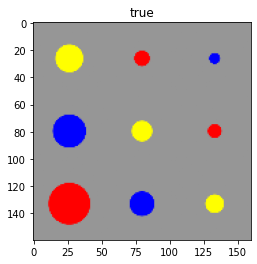

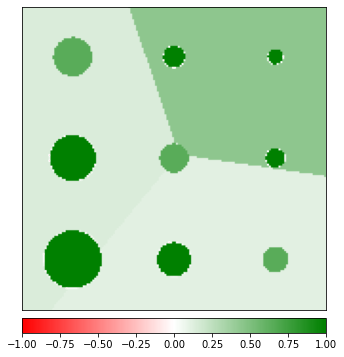

true vs true


Lime attribution: 100%|██████████| 200/200 [00:25<00:00,  7.72it/s]


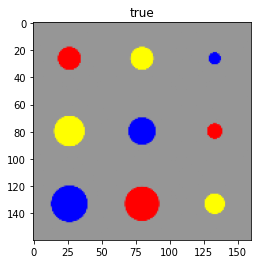

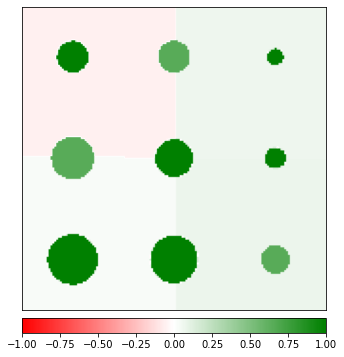

true vs true


Lime attribution: 100%|██████████| 200/200 [00:25<00:00,  7.75it/s]


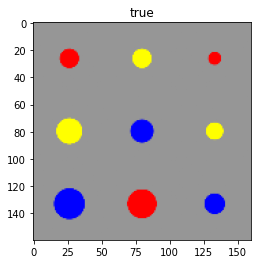

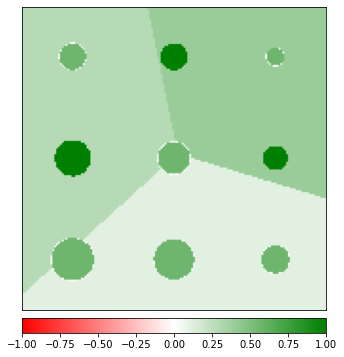

true vs true


Lime attribution: 100%|██████████| 200/200 [00:26<00:00,  7.69it/s]


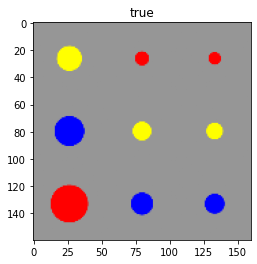

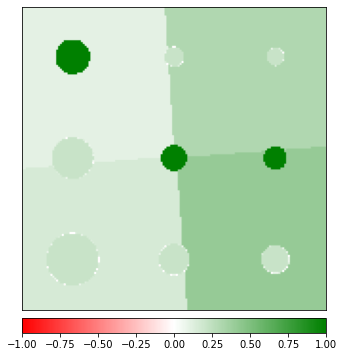

true vs true


Lime attribution: 100%|██████████| 200/200 [00:26<00:00,  7.66it/s]


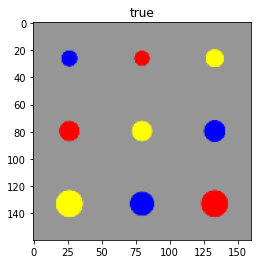

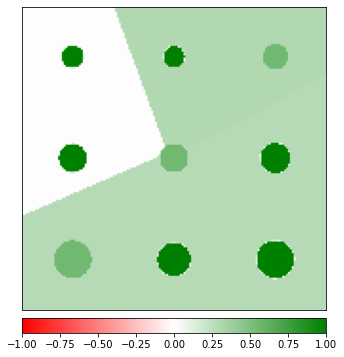

true vs true


Lime attribution: 100%|██████████| 200/200 [00:25<00:00,  7.72it/s]


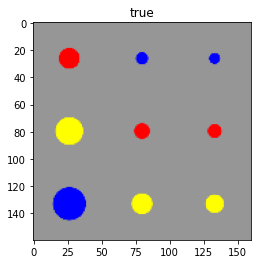

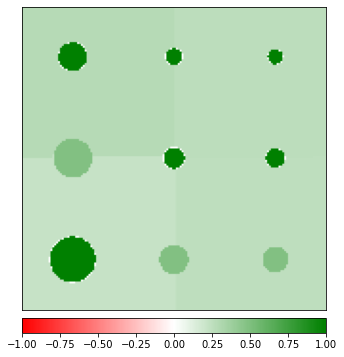

true vs true


Lime attribution: 100%|██████████| 200/200 [00:25<00:00,  7.74it/s]


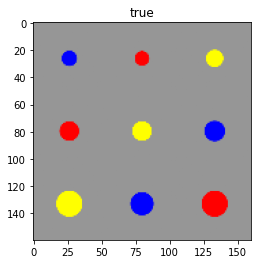

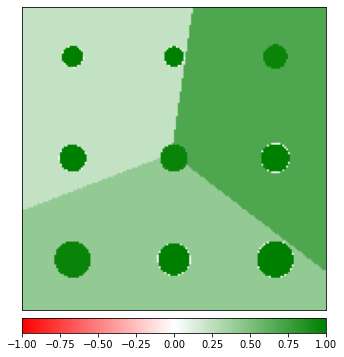

In [ ]:
for i in range(10):
    imshow(data[11*i+2000])
    Lime2(data[11*i+2000], data[11*i+2000][1])

## Wnioski
Wyjaśnienia uzyskane w ten sposół nie są pomocne. Bardzo często koła o kolorze niebieskim i czerwonym mają ten sam kolor "wpływu" - inny niż dla kółek żółtych. Uzyskane w ten sposób predykcję nie zwracają uwagi na rozmiar kołek lub np kolejność kolorów.

# Lime1 - podział na 9 kwadratów, układ 3x3
Dla każdego kołka rozważamy obszar w którym się znajduję. Ta maska może być bardziej pomocna np do obserwacji różnic wynikających z rozmiarów kółek.
Otrzymujemy 9 wartości wpływów, które dla każdej obserwacji są dzielone według tej samej maski.



### Lime1 -Counterfactual

counterfactual vs counterfactual


Lime attribution: 100%|██████████| 200/200 [00:38<00:00,  5.14it/s]


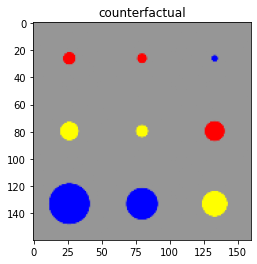

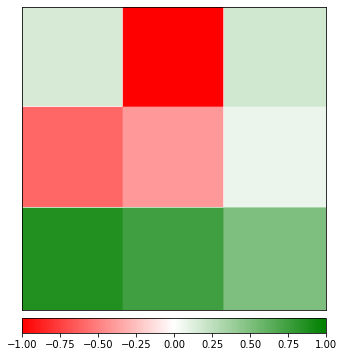

counterfactual vs counterfactual


Lime attribution: 100%|██████████| 200/200 [00:28<00:00,  6.96it/s]


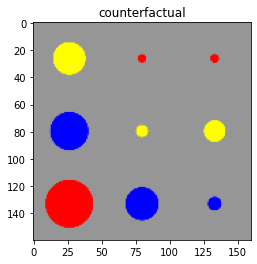

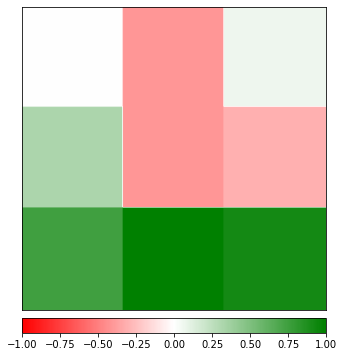

counterfactual vs counterfactual


Lime attribution: 100%|██████████| 200/200 [00:28<00:00,  7.01it/s]


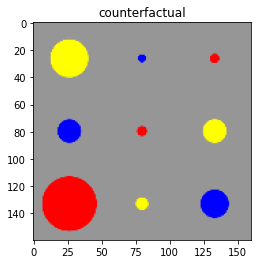

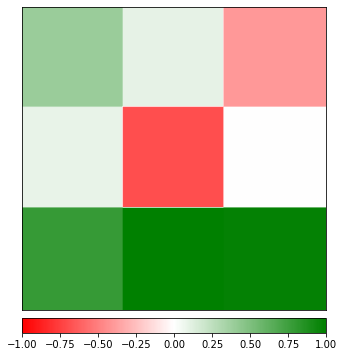

counterfactual vs counterfactual


Lime attribution: 100%|██████████| 200/200 [00:28<00:00,  6.91it/s]


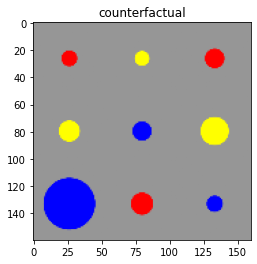

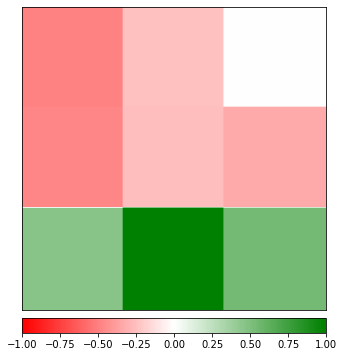

counterfactual vs counterfactual


Lime attribution: 100%|██████████| 200/200 [00:28<00:00,  7.00it/s]


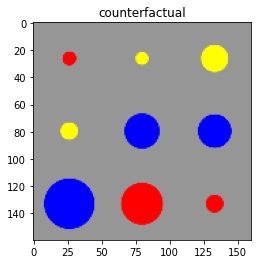

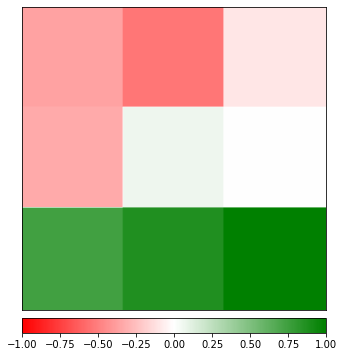

counterfactual vs counterfactual


Lime attribution: 100%|██████████| 200/200 [00:28<00:00,  6.95it/s]


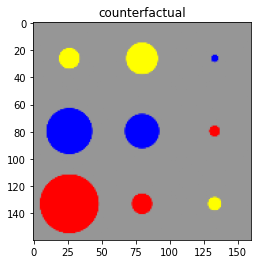

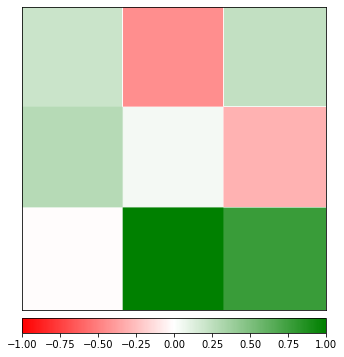

counterfactual vs counterfactual


Lime attribution: 100%|██████████| 200/200 [00:28<00:00,  6.96it/s]


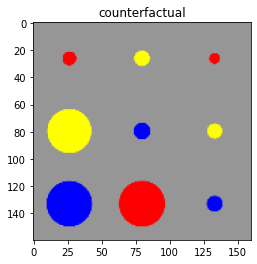

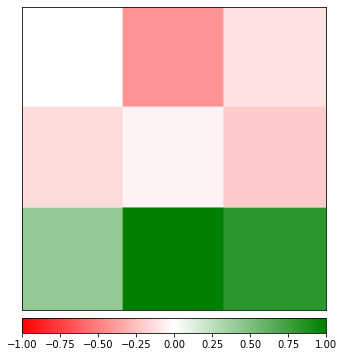

counterfactual vs counterfactual


Lime attribution: 100%|██████████| 200/200 [00:29<00:00,  6.77it/s]


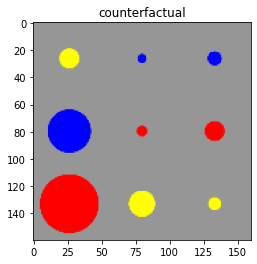

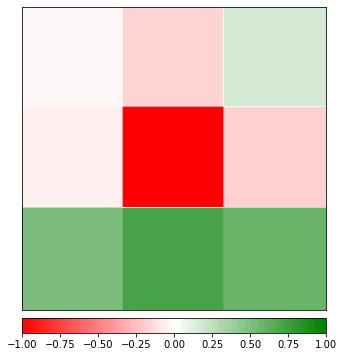

counterfactual vs counterfactual


Lime attribution: 100%|██████████| 200/200 [00:28<00:00,  6.92it/s]


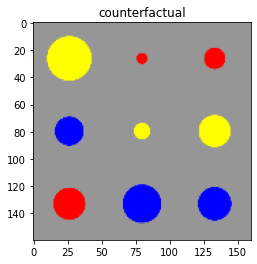

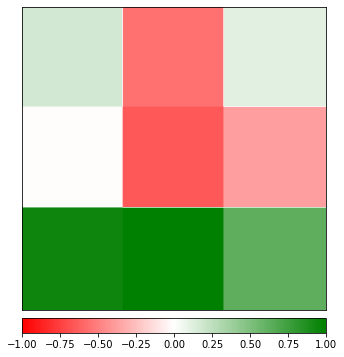

counterfactual vs counterfactual


Lime attribution: 100%|██████████| 200/200 [00:28<00:00,  6.93it/s]


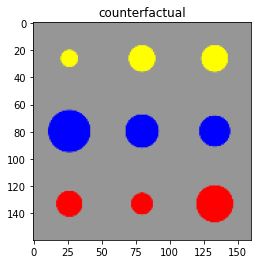

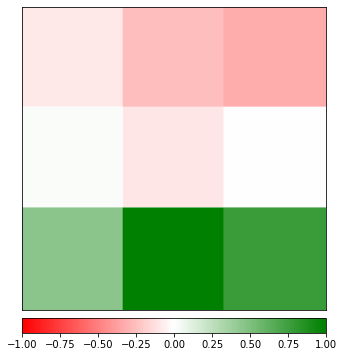

In [ ]:
for i in range(10):
    imshow(data[11*i])
    Lime1(data[11*i], data[11*i][1])

### Wnioski
Dla klasy "counterfactual" często dolny rząd wyjaśnień jest "zielony". Może bazą predykcji dla tej klasy są duże kółka w dolnym rzędzie - może to być związane ze wzorcem: kołka malejące kolumnami w doł. Predykcję "uzupełniają" rząd środkowy i górny. W tych miejscach mogą znjdować się bardzo małe kółka które podjerzewamy o bycie elementem charakterystycznym dla tego zbioru.

### Lime1-False

false vs false


Lime attribution: 100%|██████████| 200/200 [00:31<00:00,  6.27it/s]


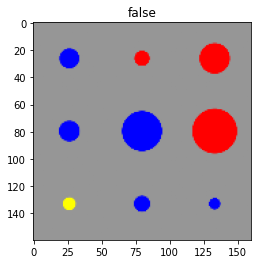

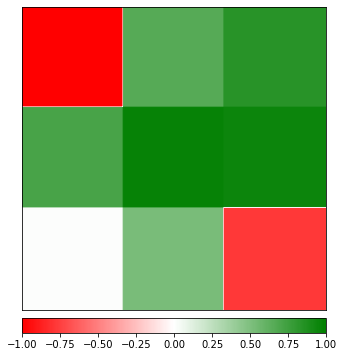

false vs false


Lime attribution: 100%|██████████| 200/200 [00:28<00:00,  6.94it/s]


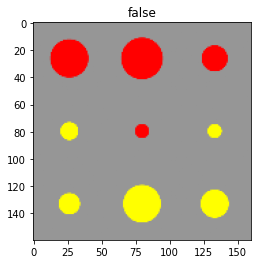

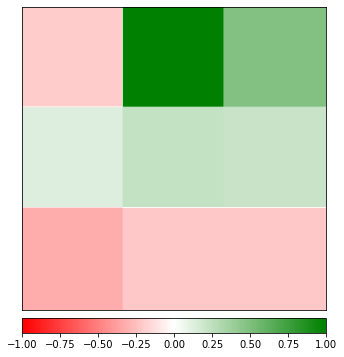

false vs false


Lime attribution: 100%|██████████| 200/200 [00:28<00:00,  6.90it/s]


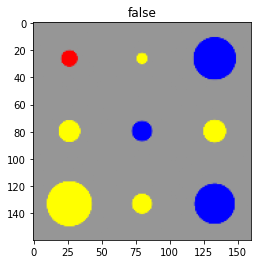

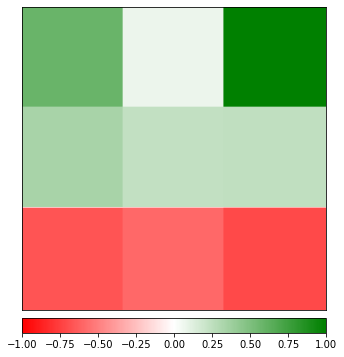

false vs false


Lime attribution: 100%|██████████| 200/200 [00:29<00:00,  6.82it/s]


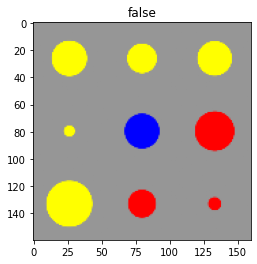

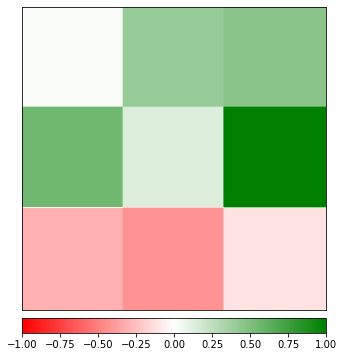

false vs false


Lime attribution: 100%|██████████| 200/200 [00:29<00:00,  6.75it/s]


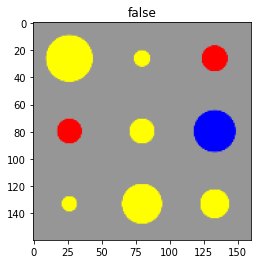

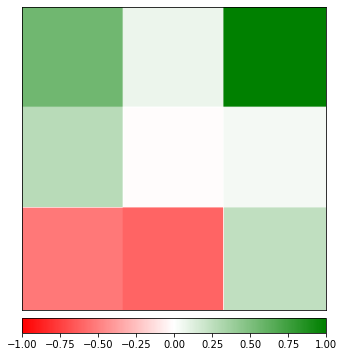

false vs false


Lime attribution: 100%|██████████| 200/200 [00:28<00:00,  6.90it/s]


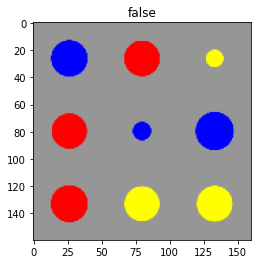

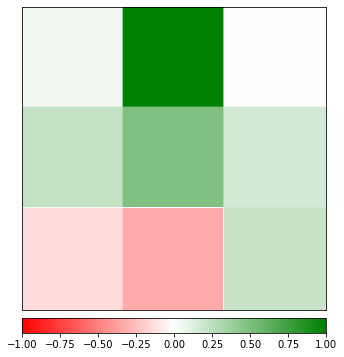

false vs false


Lime attribution: 100%|██████████| 200/200 [00:29<00:00,  6.89it/s]


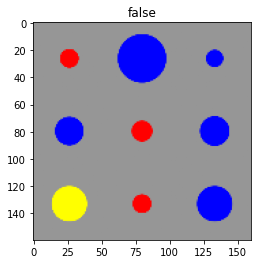

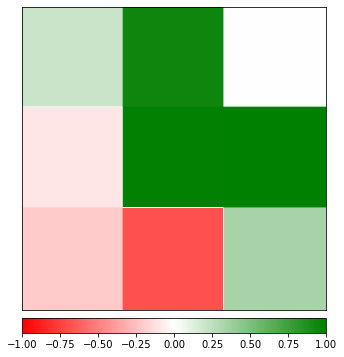

false vs false


Lime attribution: 100%|██████████| 200/200 [00:29<00:00,  6.88it/s]


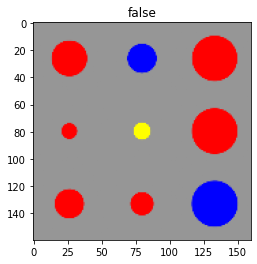

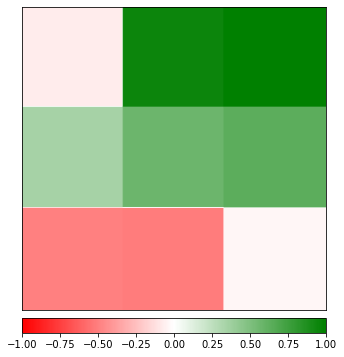

false vs false


Lime attribution: 100%|██████████| 200/200 [00:29<00:00,  6.88it/s]


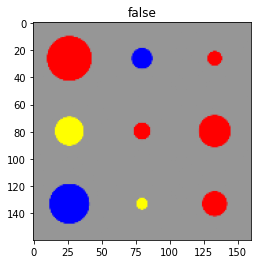

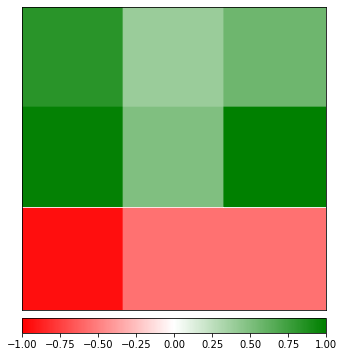

false vs false


Lime attribution: 100%|██████████| 200/200 [00:29<00:00,  6.88it/s]


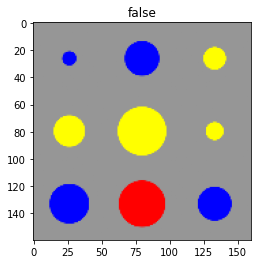

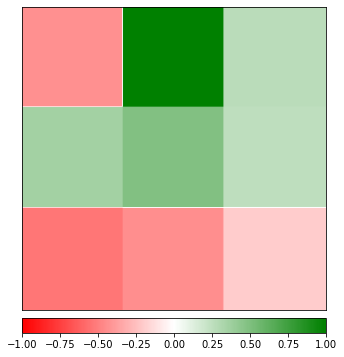

In [ ]:
for i in range(10):
    imshow(data[11*i + 1000])
    Lime1(data[11*i+1000], data[11*i+1000][1])

### Wnioski
Dla klasy "false" że zielone kwadraty często pojawiają się w środkowym i górnym rzędzie. Odpowiadają one często kółkom czerwonym i niebieskim - podobne zachowanie do poprzednich wyjaśnień, ale nie da się, patrząc na wyjaśnienia, stwierdzić, które koła są żołte.

### Lime1-True

true vs true


Lime attribution: 100%|██████████| 200/200 [00:22<00:00,  8.97it/s]


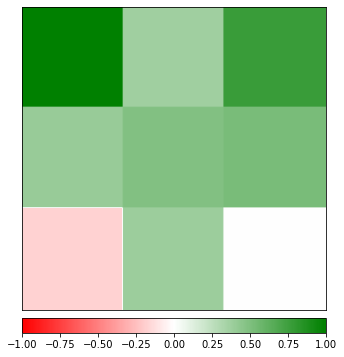

true vs true


Lime attribution: 100%|██████████| 200/200 [00:21<00:00,  9.26it/s]


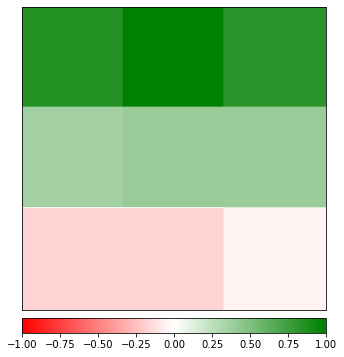

true vs true


Lime attribution: 100%|██████████| 200/200 [00:21<00:00,  9.33it/s]


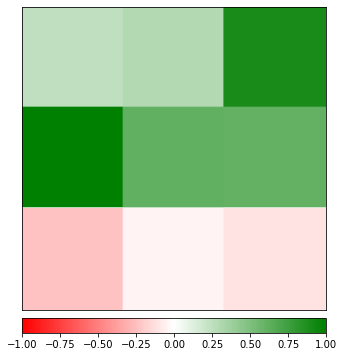

true vs true


Lime attribution: 100%|██████████| 200/200 [00:21<00:00,  9.25it/s]


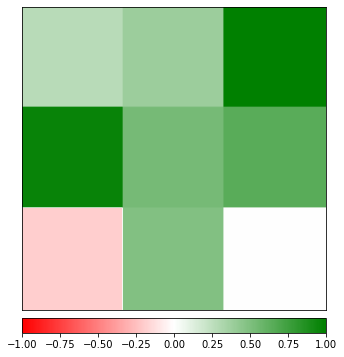

true vs true


Lime attribution: 100%|██████████| 200/200 [00:21<00:00,  9.31it/s]


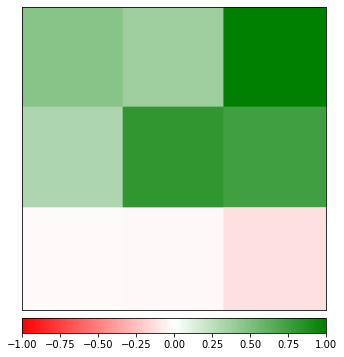

true vs true


Lime attribution: 100%|██████████| 200/200 [00:21<00:00,  9.33it/s]


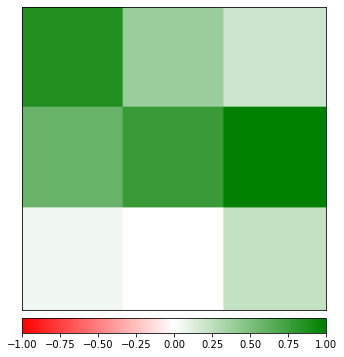

true vs true


Lime attribution: 100%|██████████| 200/200 [00:21<00:00,  9.34it/s]


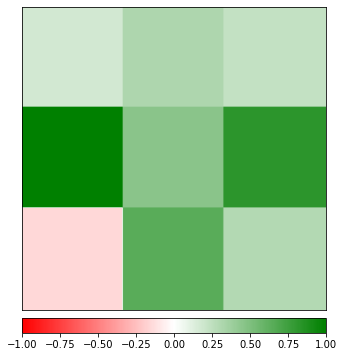

true vs true


Lime attribution: 100%|██████████| 200/200 [00:21<00:00,  9.28it/s]


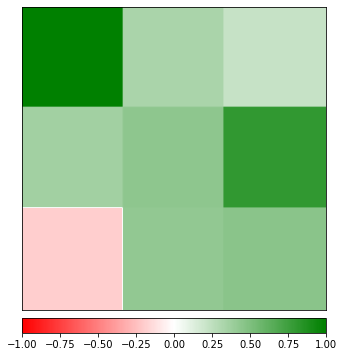

true vs true


Lime attribution: 100%|██████████| 200/200 [00:26<00:00,  7.47it/s]


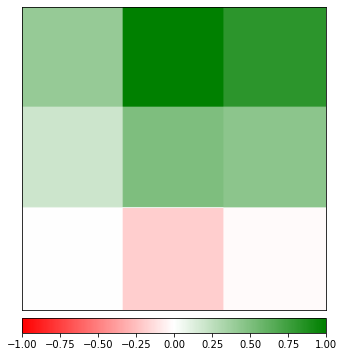

true vs true


Lime attribution: 100%|██████████| 200/200 [00:24<00:00,  8.22it/s]


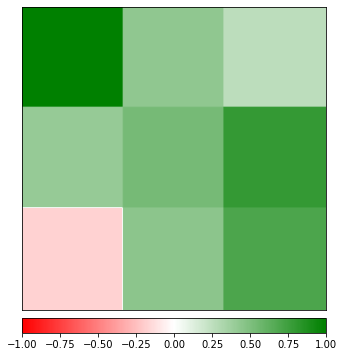

In [ ]:
for i in range(10):
    imshow(data[11*i+2000])
    Lime1(data[11*i+2000], data[11*i+2000][1])

### Wnioski
Dla klasy "true" wyjaśnienia zwracają głównie zielone i białe kolory. Nie pojawiają się żadne kwadraty które mogły by dodać trochę niepewności do predykcji, co może wydawać się nieintuicyjne bo dla nas ta klasa jest bardzo podobna do klasy "counterfacrual".